In [316]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [366]:
np.random.seed(1)
datos = np.loadtxt('datos2.txt')
np.random.shuffle(datos)
datos = np.transpose(datos)
x = datos[:2,:]
y = datos[-1:]

print('Tamaño Datos:', datos.shape)
print('Tamaño X, Y: ', x.shape, y.shape)
print('X', x)
print('Y', y)
m = len(y[0])
limite = int(0.8 * m)
xTrain, xTest = x[:, :limite], x[:, limite:]
yTrain, yTest = y[:,:limite], y[:,limite:]

print('xTrain, xTest: ', xTrain.shape, xTest.shape)
print('yTrain, yTest: ', yTrain.shape, yTest.shape)

# y = 1 * (y_total == 0)
# y2 = 1 * (y_total == 1)
# y3 = 1 * (y_total == 2)

Tamaño Datos: (3, 3000)
Tamaño X, Y:  (2, 3000) (1, 3000)
X [[7.08146855 3.57893446 5.34073113 ... 5.6100421  7.85002784 5.09313198]
 [6.19290511 5.53340881 7.32337241 ... 7.08018734 0.84344671 6.00638513]]
Y [[1. 2. 1. ... 1. 0. 1.]]
xTrain, xTest:  (2, 2400) (2, 600)
yTrain, yTest:  (1, 2400) (1, 600)


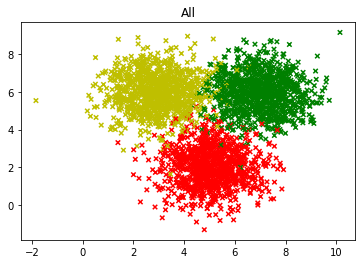

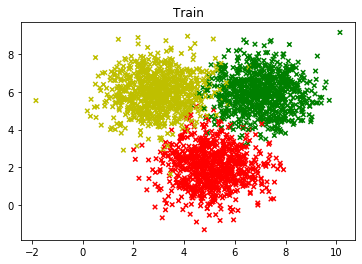

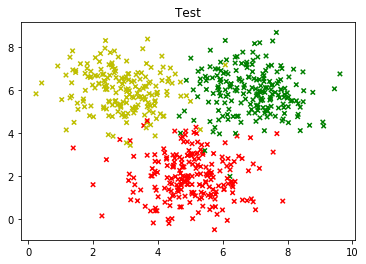

In [375]:
def scatter_data(x, y, title=''):
    color = np.where(y[0] == 0, 'r', np.where(y[0] == 1, 'g', 'y'))
    plt.scatter(x[0], x[1], marker='x', s = 20, c = color)
    plt.title(title)
    plt.show()

scatter_data(x, y, 'All')
scatter_data(xTrain, yTrain, 'Train')
scatter_data(xTest, yTest, 'Test')

In [457]:
learning_rate = 0.0001
epochs = 500

In [458]:
X = tf.constant(xTrain, dtype = tf.float32)
X2 = tf.constant(xTrain[1], dtype = tf.float32)
Y = tf.constant(1*(yTrain == 0), dtype = tf.float32)
Y2 = tf.constant(1*(yTrain == 1), dtype = tf.float32)
Y3 = tf.constant(1*(yTrain == 2), dtype = tf.float32)

print(X.shape)
print(Y[0,:10].numpy())
print(Y2[0,:10].numpy())
print(Y3[0,:10].numpy())

W = tf.Variable([0.]*3, dtype = tf.float32)

(2, 2400)
[0. 0. 0. 0. 0. 1. 1. 1. 1. 0.]
[1. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 1.]


In [459]:
def sigmoidal(z):
    return 1/(1 + np.exp(-z))

def modelo(W, X):
    # Calculamos el grado del polinomio.
    n = len(W.numpy())
    m = 0
    for i in range(n):
        m = m + W[i]*(X[0][i]**i)
    return tf.sigmoid(m)

def costo(W, X, Y):
    return tf.reduce_mean(-Y*tf.math.log(modelo(W, X)) - (1 - Y)*tf.math.log(1 - modelo(W, X)))

def costo_minimizar():
    return tf.reduce_mean(-Y*tf.math.log(modelo(W, X)) - (1 - Y)*tf.math.log(1 - modelo(W, X)))

train_op = tf.keras.optimizers.SGD(learning_rate)

In [406]:
def sigmoidal(z):
    return 1/(1 + np.exp(-z))

def modelo(W, X1, X2):
    # Calculamos el grado del polinomio.
    n = len(W.numpy())
    m = 0
    for i in range(n):
        m = m + W[i]*(X**i)
    return m
    return tf.sigmoid(W[0] + W[1]*X1 + W[2]*X2)

def costo(W, X1, X2, Y):
    return tf.reduce_mean(-Y*tf.math.log(modelo(W, X1, X2)) - (1 - Y)*tf.math.log(1 - modelo(W, X1, X2)))

def costo_minimizar():
    return tf.reduce_mean(-Y*tf.math.log(modelo(W, X1, X2)) - (1 - Y)*tf.math.log(1 - modelo(W, X1, X2)))

train_op = tf.keras.optimizers.SGD(learning_rate)

In [460]:
hist_error = []
prev_error = 1000
for epoch in range(epochs):
    error = costo(W, X, Y).numpy()
    hist_error.append(error)
    train_op.minimize(costo_minimizar, var_list = [W])
    # print(prev_error, error)
    if abs(prev_error - error) < 0.00001:
        print(f'Época final: {epoch}')
        break
    prev_error = error
print(f'[W]: {W.numpy()}')

Época final: 135
[W]: [-0.00080274 -0.00287296 -0.02289697]


0.63302356


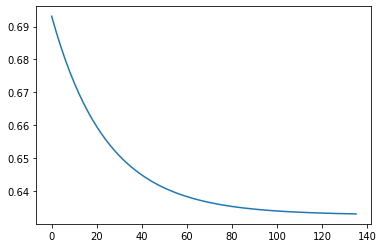

In [461]:
print(error)
plt.plot(hist_error)
plt.show()

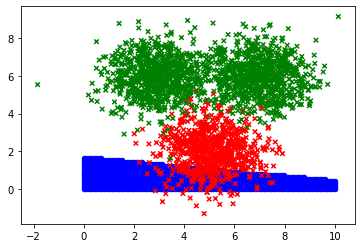

In [462]:
# Graficando las fronteras
x1F, x2F = [], []
for x1P in np.linspace(0, 10, 100):
    for x2P in np.linspace(0, 10, 100):
        yP = sigmoidal(W[0] + W[1]*x1P + W[2]*x2P)
        if (abs(yP - 0.5) < 0.01):
            x1F.append(x1P)
            x2F.append(x2P)

plt.scatter(x1F, x2F, color = 'b', marker = 'o', s = 20)
color = np.where(yTrain[0] == 0, 'r', 'g')
plt.scatter(xTrain[0], xTrain[1], marker='x', s = 20, color = color)

plt.show()

In [473]:
# Calculando la confianza de clasificación
num_aciertos = 0
for i in range(len(yTrain[0])):
    y_gorrito = sigmoidal(W[0] + W[1]*xTrain[0][i] + W[2]*xTrain[0][i])
    if y_gorrito < 0.5:
        clase = 0
    else:
        clase = 1
    if clase == yTrain[0][i]:
        num_aciertos += 1
print(f'% de Aciertos: {100*num_aciertos/len(yTrain[0])}')

% de Aciertos: 32.791666666666664


In [180]:
# Producción
# Clasificando algunos valores nuevos
xTest = [[2, 2], [8, 6], [4, 2], [5, 4], [6, 0], [6, 4]]
yTest = []
for i in range(len(xTest)):
    y_gorrito = sigmoidal(W[0] + W[1]*xTest[i][0] + W[2]*xTest[i][1])
    if y_gorrito < 0.5:
        yTest.append(0)
    else:
        yTest.append(1)
print(f'Predicción: {yTest}')

Predicción: [0, 0, 1, 0, 1, 0]
